In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay,
    classification_report,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans  # For unsupervised clustering
import sklearn
import joblib


In [2]:
df = pd.read_csv("Wilson_disease_dataset.csv")
print(df.head())
print(df.info())

              Name  Age     Sex  Ceruloplasmin Level  Copper in Blood Serum  \
0     Daniel Perry   14  Female             9.341193             229.035586   
1      Lauren Luna   21  Female             9.149010             200.239637   
2     Andrew Lewis   31    Male             9.768630             267.343650   
3  Trevor Villegas   19    Male            11.915923             221.104453   
4       John Mills   30  Female             9.500291             230.140212   

   Free Copper in Blood Serum  Copper in Urine        ALT         AST  \
0                         NaN       144.987111  73.711588   72.047328   
1                   16.153480       104.192937  25.896181   67.512312   
2                   14.373756       153.177037  45.918204   76.687723   
3                    4.326112       159.542682  53.625145  103.375310   
4                   23.433224       124.989992  68.076335   82.279210   

   Total Bilirubin  ...  Neurological Symptoms Score  Psychiatric Symptoms  \
0       

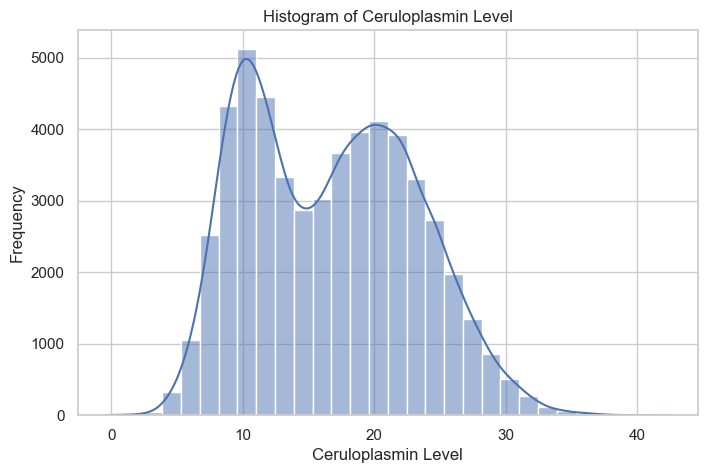

In [3]:
# Convert target variable to categorical for plotting
df['Is_Wilson_Disease'] = df['Is_Wilson_Disease'].astype('category')

# Set seaborn theme
sns.set(style="whitegrid")

# 1. Histogram - Ceruloplasmin Level
plt.figure(figsize=(8, 5))
sns.histplot(df['Ceruloplasmin Level'].dropna(), kde=True, bins=30)
plt.title('Histogram of Ceruloplasmin Level')
plt.xlabel('Ceruloplasmin Level')
plt.ylabel('Frequency')
plt.show()
import joblib
import pandas as pd
import numpy as np  # Added for np.nan

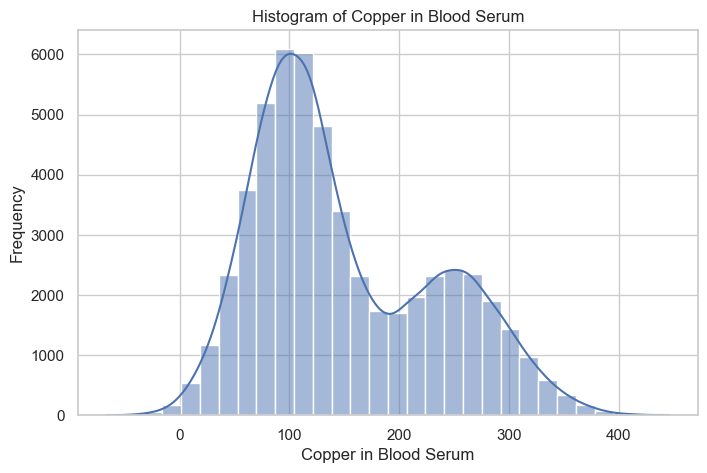

In [4]:
# 2. Histogram - Copper in Blood Serum
plt.figure(figsize=(8, 5))
sns.histplot(df['Copper in Blood Serum'].dropna(), kde=True, bins=30)
plt.title('Histogram of Copper in Blood Serum')
plt.xlabel('Copper in Blood Serum')
plt.ylabel('Frequency')
plt.show()



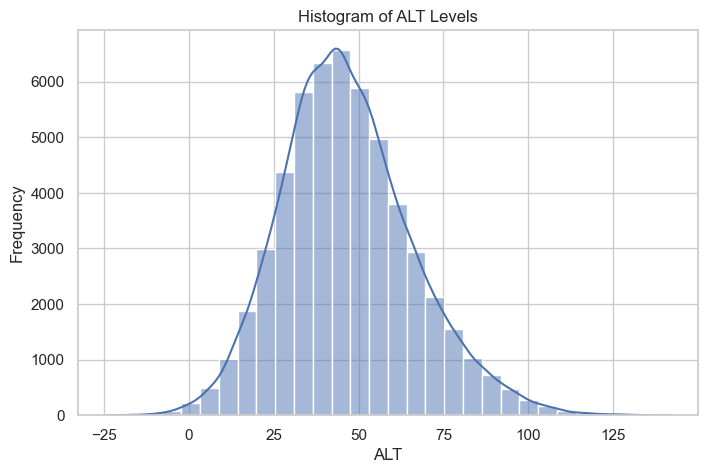

In [5]:
# 3. Histogram - ALT
plt.figure(figsize=(8, 5))
sns.histplot(df['ALT'].dropna(), kde=True, bins=30)
plt.title('Histogram of ALT Levels')
plt.xlabel('ALT')
plt.ylabel('Frequency')
plt.show()



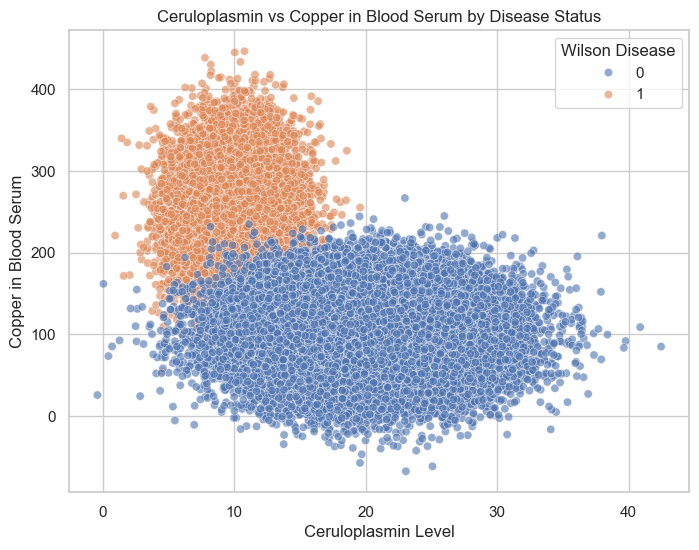

In [6]:
# 4. Scatter Plot - Ceruloplasmin vs Copper in Blood Serum
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Ceruloplasmin Level', y='Copper in Blood Serum', hue='Is_Wilson_Disease', alpha=0.6)
plt.title('Ceruloplasmin vs Copper in Blood Serum by Disease Status')
plt.xlabel('Ceruloplasmin Level')
plt.ylabel('Copper in Blood Serum')
plt.legend(title='Wilson Disease')
plt.show()



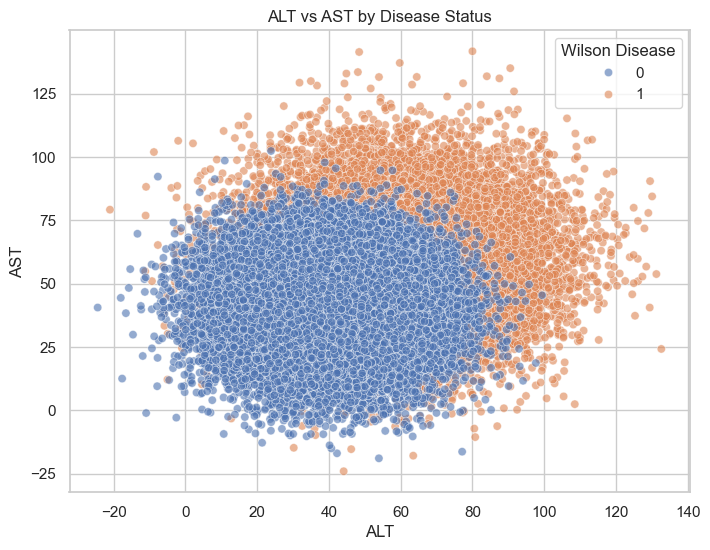

In [7]:
# 5. Scatter Plot - ALT vs AST
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ALT', y='AST', hue='Is_Wilson_Disease', alpha=0.6)
plt.title('ALT vs AST by Disease Status')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend(title='Wilson Disease')
plt.show()



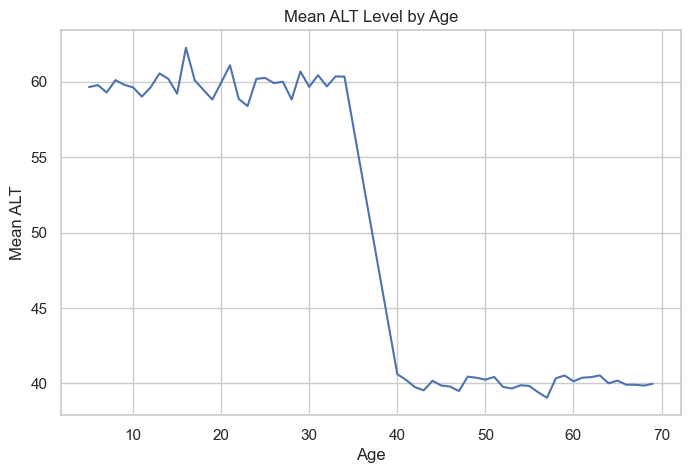

In [8]:
# 6. Line Chart - Mean ALT by Age
plt.figure(figsize=(8, 5))
df.groupby('Age')['ALT'].mean().plot()
plt.title('Mean ALT Level by Age')
plt.ylabel('Mean ALT')
plt.xlabel('Age')
plt.grid(True)
plt.show()



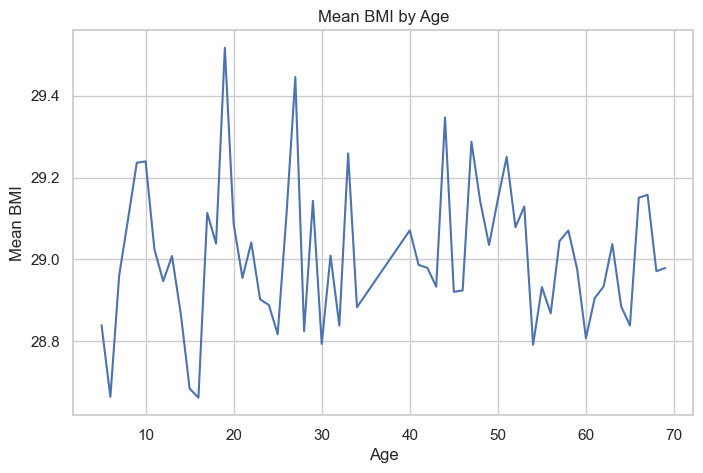

In [9]:
# 7. Line Chart - Mean BMI by Age
plt.figure(figsize=(8, 5))
df.groupby('Age')['BMI'].mean().plot()
plt.title('Mean BMI by Age')
plt.ylabel('Mean BMI')
plt.xlabel('Age')
plt.grid(True)
plt.show()


In [10]:
df = df.fillna(df.mean(numeric_only=True))

In [11]:
# Generate data
X, y = make_classification(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Linear Regression (binary)": LinearRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naïve Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression()
}

# Evaluate models and store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    if name == "Linear Regression (binary)":
        probs = model.predict(X_test)
        preds = [1 if p > 0.5 else 0 for p in probs]
        roc_auc_score_value = roc_auc_score(y_test, probs)
    else:
        preds = model.predict(X_test)
        roc_auc_score_value = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds),
        "ROC AUC": roc_auc_score_value if roc_auc_score_value is not None else "N/A"
    })

# Create and print DataFrame
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


                     Model  Accuracy  Precision   Recall  F1 Score  ROC AUC
             Random Forest      0.95   0.936170 0.956522  0.946237 0.988728
                       KNN      0.90   0.891304 0.891304  0.891304 0.959340
                       SVM      0.88   0.854167 0.891304  0.872340 0.967391
Linear Regression (binary)      0.88   0.854167 0.891304  0.872340 0.949678
             Decision Tree      0.92   0.895833 0.934783  0.914894 0.921095
               Naïve Bayes      0.88   0.869565 0.869565  0.869565 0.966989
       Logistic Regression      0.88   0.854167 0.891304  0.872340 0.946055


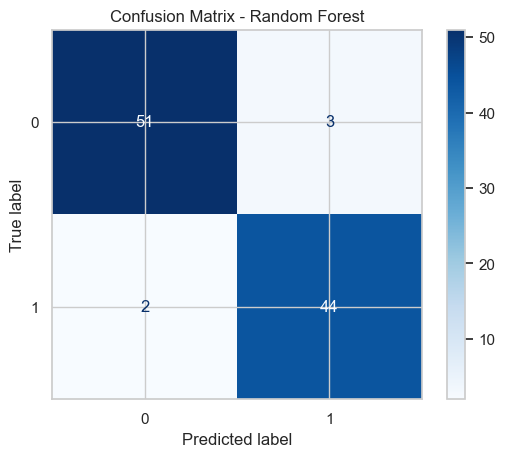

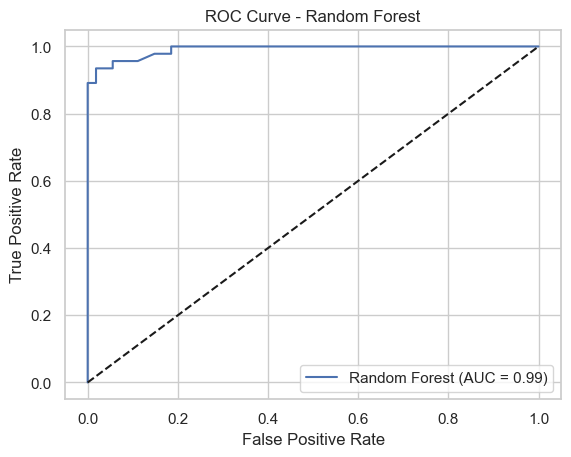

In [12]:
# Train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get predictions on test data (matching y_test size)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Now confusion matrix will work properly
cm = confusion_matrix(y_test, rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc_score_value = roc_auc_score(y_test, rf_probs)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score_value:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [13]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Save trained model and feature names
joblib.dump(rf_model, "rf_model.pkl")



['rf_model.pkl']

In [14]:
# Example: Load or create your training data as a DataFrame
# For demo, we'll generate dummy data with feature names
np.random.seed(42)
feature_names = [
    "Age", "Sex", "Region", "Ceruloplasmin Level", "Serum Copper",
    "Urine Copper", "ALT", "AST", "Bilirubin", "Albumin"
]
n_samples = 500
X = pd.DataFrame(np.random.rand(n_samples, len(feature_names)), columns=feature_names)

# Create a binary target variable (random for demo)
y = np.random.randint(0, 2, size=n_samples)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Save model and feature names
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(feature_names, "feature_names.pkl")

print("Model and feature names saved.")


Model and feature names saved.


In [ ]:
# Load trained model and feature names
rf_model = joblib.load("willamdiease.pkl")
feature_names = joblib.load("feature_names.pkl")

# Load patient data
patient_df = pd.read_csv("new_patient.csv")

print(df.head())

# Drop columns if they exist (e.g., Name)
patient_df = patient_df.drop(columns=["Name"], errors='ignore')

# Encode categorical values (update mappings to match your dataset)
patient_df["Sex"] = patient_df["Sex"].map({"Female": 0, "Male": 1}).fillna(-1).astype(int)
region_map = {"West": 0, "South": 1, "East": 2, "North": 3}
patient_df["Region"] = patient_df["Region"].map(region_map).fillna(-1).astype(int)

# Add missing expected features with NaN
for col in feature_names:
    if col not in patient_df.columns:
        patient_df[col] = np.nan

# Reorder columns to match training
patient_df = patient_df[feature_names]

# Fill missing numeric values with column mean
for col in patient_df.columns:
    if patient_df[col].dtype in [np.float64, np.int64]:
        patient_df[col].fillna(patient_df[col].mean(), inplace=True)
    else:
        patient_df[col].fillna(-1, inplace=True)

# Predict
predictions = rf_model.predict(patient_df)
probabilities = rf_model.predict_proba(patient_df)

# Create report
results = []
for i, (pred, prob) in enumerate(zip(predictions, probabilities), start=1):
    results.append({
        "Patient_ID": i,
        "Prediction": "Positive for Wilson’s Disease" if pred == 1 else "Negative for Wilson’s Disease",
        "Confidence (%)": round(prob[1] * 100, 2)
    })

report_df = pd.DataFrame(results)

# Save report
report_df.to_csv("diagnostic_report.csv", index=False)

# Display report
print("------ Diagnostic Report ------")
print(report_df.to_string(index=False))
print("\nReport saved as: diagnostic_report.csv")


2025-05-23 22:48:32.826 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 22:48:33.607 
  command:

    streamlit run C:\Users\panth\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-23 22:48:33.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 22:48:33.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 22:48:33.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 22:48:33.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 22:48:33.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 22:48:33.614 Thre

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

test_sizes = [0.1, 0.2, 0.3, 0.4]

# Initialize the model
model = RandomForestClassifier(random_state=42)

for test_size in test_sizes:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, probs)
    
    # Print results
    print(f"Train-Test Split: {100 - int(test_size*100)}-{int(test_size*100)}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")
    print('-' * 30)


Train-Test Split: 90-10
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
ROC AUC: 1.000
------------------------------
Train-Test Split: 80-20
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
ROC AUC: 1.000
------------------------------
Train-Test Split: 70-30
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
ROC AUC: 1.000
------------------------------
Train-Test Split: 60-40
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
ROC AUC: 1.000
------------------------------


In [21]:
# Assume the target column is named 'Is_Wilson_Disease' (change if needed)
target_col = 'Is_Wilson_Disease'

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Encoding categorical variables
# Identify categorical columns (example: object dtype)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply label encoding for each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to str in case of mixed types

# Handle missing values by imputing with column mean for numeric features
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col].fillna(X[col].mean(), inplace=True)
    else:
        # For categorical columns, fill missing with mode or a new category
        X[col].fillna(X[col].mode()[0], inplace=True)

# Encode target variable if needed
if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y)

# Define test sizes to evaluate
test_sizes = [0.1, 0.2, 0.3]

# Initialize model
model = RandomForestClassifier(random_state=42)

# Loop over test sizes
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, probs)
    
    print(f"Train-Test Split: {100 - int(test_size*100)}-{int(test_size*100)}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")
    print('-' * 30)


C:\Users\panth\AppData\Local\Temp\ipykernel_2844\1638072887.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)
C:\Users\panth\AppData\Local\Temp\ipykernel_2844\1638072887.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Train-Test Split: 90-10
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
ROC AUC: 1.000
------------------------------
Train-Test Split: 80-20
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
ROC AUC: 1.000
------------------------------
Train-Test Split: 70-30
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
ROC AUC: 1.000
------------------------------


In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('Wilson_disease_dataset.csv')

# Define target column
target_col = 'Is_Wilson_Disease'

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Handle missing values
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col].fillna(X[col].mean(), inplace=True)
    else:
        X[col].fillna(X[col].mode()[0], inplace=True)

# Encode target if categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Augmentation with SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# 1. K-Fold Cross-Validation (5 folds)
cv_scores = cross_val_score(rf, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.3f}")

# 2. Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.3f}")

# 3. Evaluate best model on a hold-out test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


C:\Users\panth\AppData\Local\Temp\ipykernel_2844\3200657644.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)
C:\Users\panth\AppData\Local\Temp\ipykernel_2844\3200657644.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.000
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 1.000

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8069
           1       1.00      1.00      1.00      7931

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

